In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer,KNNImputer
from sklearn.preprocessing import (
    StandardScaler,
    MinMaxScaler,
    QuantileTransformer,
    OneHotEncoder,
    OrdinalEncoder
)

pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [ ]:
def plot_distributions(original, transformed, title):
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    # Antes de la transformación
    sns.histplot(original, bins=30, kde=True, ax=axes[0])
    axes[0].set_title(f'Distribución Original - {title}')

    # Después de la transformación
    sns.histplot(transformed, bins=30, kde=True, ax=axes[1])
    axes[1].set_title(f'Distribución Transformada - {title}')

    plt.show()

# 🛠️ **Introducción al Preprocesamiento de Datos**
Antes de entrenar un modelo de Machine Learning, es crucial preparar los datos correctamente. El **preprocesamiento de datos** nos ayuda a limpiar, transformar y mejorar la calidad de la información para que el modelo pueda aprender de manera efectiva.  

Dos de las tareas más comunes en el preprocesamiento son:  

## 🔹 **1. Imputación de Datos**
A veces, nuestros datasets contienen valores faltantes (**NaN, None**). Ignorar estos valores podría hacer que el modelo pierda información valiosa.  
**Ejemplo real:** En una base de datos de clientes, algunos registros pueden no tener la edad registrada.  

### 🛠️ **Soluciones comunes:**
✔️ **Eliminar los registros con valores faltantes** (si la cantidad de datos eliminados es mínima).  
✔️ **Reemplazar valores faltantes** con:
   - La **media** o **mediana** (para valores numéricos).  
   - El **valor más frecuente** (para valores categóricos).  
   - Un valor especial como `"Desconocido"` en textos.  

## 🔹 **2. Transformación de Datos**
A veces, los datos no tienen el formato adecuado para los modelos de Machine Learning.  
**Ejemplo real:** Convertir precios en diferentes monedas a una sola moneda o transformar valores categóricos en números.  

### 🛠️ **Transformaciones comunes:**
✔️ **Normalización y Estandarización**: Escalar valores numéricos para que todos tengan la misma magnitud.  
✔️ **Codificación de variables categóricas**: Convertir texto en números para que el modelo pueda interpretarlos (ejemplo: `One-Hot Encoding`).  
✔️ **Transformaciones matemáticas**: Aplicar logaritmos o raíces para reducir la variabilidad de los datos.  

🔜 **En los siguientes apartados, veremos estas técnicas con más detalle y ejemplos prácticos.** 🚀


In [ ]:
data = {
    'Edad': [25, 30, None, 40, 35, None, 50],
    'Salario': [40000, 50000, 60000, None, 55000, 48000, 52000],
    'Ciudad': ['Bogotá', 'Medellín', 'Bogotá', 'Cali', None, 'Medellín', 'Cali']
}

df = pd.DataFrame(data)
print("🔹 Datos originales:")
df

🔹 Datos originales:


,Edad,Salario,Ciudad
0,25.0,40000.0,Bogotá
1,30.0,50000.0,Medellín
2,NaN,60000.0,Bogotá
3,40.0,NaN,Cali
4,35.0,55000.0,None
5,NaN,48000.0,Medellín
6,50.0,52000.0,Cali


In [ ]:
# 📌 Imputación de valores faltantes manualmente:
df['Edad'] = df['Edad'].fillna(df['Edad'].mean())  # Reemplazamos con la media
df['Salario'] = df['Salario'].fillna(df['Salario'].mean())
df['Ciudad'] = df['Ciudad'].fillna('Desconocido')  # Imputación para valores categóricos

# 📌 Transformación: Codificación One-Hot para la columna 'Ciudad'
df = pd.get_dummies(df, columns=['Ciudad'])

# 📌 Normalización manual de las columnas numéricas (media 0, desviación estándar 1)
df['Edad'] = (df['Edad'] - df['Edad'].mean()) / df['Edad'].std()
df['Salario'] = (df['Salario'] - df['Salario'].mean()) / df['Salario'].std()

print("\n✅ Datos después de imputación y transformación:")
df


✅ Datos después de imputación y transformación:


,Edad,Salario,Ciudad_Bogotá,Ciudad_Cali,Ciudad_Desconocido,Ciudad_Medellín
0,-1.400772,-1.754196,True,False,False,False
1,-0.764057,-0.134938,False,False,False,True
2,0.000000,1.484320,True,False,False,False
3,0.509372,0.000000,False,True,False,False
4,-0.127343,0.674691,False,False,True,False
5,0.000000,-0.458790,False,False,False,True
6,1.782801,0.188913,False,True,False,False


# 📌 Imputación de Datos usando `sklearn`

Cuando trabajamos con datos en ciencia de datos, es muy común encontrar valores faltantes. La **imputación** es el proceso de llenar esos valores vacíos con estimaciones que nos permitan seguir analizando los datos sin perder información.

## 🔹 ¿Cómo podemos imputar datos?
Existen diferentes estrategias para rellenar los valores faltantes, algunas de las más comunes son:

1. **Reemplazar con la media, mediana o moda** → Ideal para valores numéricos.
2. **Usar un valor constante** → Por ejemplo, rellenar con 0 o "Desconocido" en datos categóricos.
3. **Utilizar modelos predictivos** → En casos avanzados, podemos predecir los valores faltantes.

`sklearn` nos facilita la imputación de datos con la clase `SimpleImputer`, permitiéndonos automatizar este proceso de manera eficiente.

---
## ✨ **Ejemplo práctico en Python**
A continuación, veremos cómo imputar valores numéricos y categóricos utilizando `SimpleImputer` de `sklearn`.


In [ ]:
data = {
    'Edad': [25, 30, np.nan, 40, 35, np.nan, 50],
    'Salario': [40000, 50000, 60000, np.nan, 55000, 48000, 52000],
    'Ciudad': ['Bogotá', 'Medellín', 'Bogotá', 'Cali', None, 'Medellín', 'Cali']
}

df = pd.DataFrame(data)
print("🔹 Datos originales:")
df

🔹 Datos originales:


,Edad,Salario,Ciudad
0,25.000,40000.000,Bogotá
1,30.000,50000.000,Medellín
2,NaN,60000.000,Bogotá
3,40.000,NaN,Cali
4,35.000,55000.000,None
5,NaN,48000.000,Medellín
6,50.000,52000.000,Cali


# 📌 `SimpleImputer` en `sklearn`

Cuando trabajamos con datasets en ciencia de datos, es muy común encontrar valores faltantes (*NaN*). Si no los manejamos adecuadamente, pueden causar errores al entrenar modelos de machine learning o afectar la calidad del análisis.

Para solucionar este problema, `scikit-learn` nos ofrece la clase `SimpleImputer`, que permite rellenar los valores faltantes con diferentes estrategias de manera automática.

---
## 🔹 ¿Cómo funciona `SimpleImputer`?
`SimpleImputer` es una herramienta sencilla que permite reemplazar valores *NaN* en los datos con una estrategia predefinida. Podemos imputar valores numéricos y categóricos de distintas formas.

### 🔍 **Parámetros principales**  
📌 **`strategy`** → Define la estrategia de imputación. Puede tomar los siguientes valores:
- `"mean"` → Reemplaza los valores faltantes con la **media** de la columna.
- `"median"` → Reemplaza los valores faltantes con la **mediana**.
- `"most_frequent"` → Usa el valor más frecuente en la columna (*moda*).
- `"constant"` → Permite definir un valor constante para llenar los espacios vacíos.

📌 **`fill_value`** → Se usa cuando `strategy="constant"` para definir el valor a usar en la imputación.

📌 **`missing_values`** → Indica qué valor se considera como faltante. Por defecto, es `np.nan`, pero podemos cambiarlo.

---
## ✨ **Ejemplo de uso**
Veamos cómo usar `SimpleImputer` para imputar valores numéricos y categóricos en un dataset.



In [ ]:
# 📌 Imputación de valores numéricos con la media
imputer_num = SimpleImputer(strategy='mean')
imputer_num.fit(df[['Edad', 'Salario']])
num_transformed_columns = imputer_num.transform(df[['Edad', 'Salario']])
num_transformed_columns

array([[2.50000000e+01, 4.00000000e+04],
       [3.00000000e+01, 5.00000000e+04],
       [3.60000000e+01, 6.00000000e+04],
       [4.00000000e+01, 5.08333333e+04],
       [3.50000000e+01, 5.50000000e+04],
       [3.60000000e+01, 4.80000000e+04],
       [5.00000000e+01, 5.20000000e+04]])

In [ ]:
# 📌 Imputación de valores categóricos con
imputer_cat = SimpleImputer(
    strategy='most_frequent',
    missing_values = None
)
cat_transformed_columns = imputer_cat.fit_transform(df[['Ciudad']])
cat_transformed_columns

array([['Bogotá'],
       ['Medellín'],
       ['Bogotá'],
       ['Cali'],
       ['Bogotá'],
       ['Medellín'],
       ['Cali']], dtype=object)

In [ ]:
pd.DataFrame(
    num_transformed_columns,
    columns = ['Edad', 'Salario']
)

,Edad,Salario
0,25.000,40000.000
1,30.000,50000.000
2,36.000,60000.000
3,40.000,50833.333
4,35.000,55000.000
5,36.000,48000.000
6,50.000,52000.000


In [ ]:
imputter_dataframe = (
    pd.concat(
        [
            pd.DataFrame(num_transformed_columns,columns = ['Edad', 'Salario']),
            pd.DataFrame(cat_transformed_columns, columns = ['Ciudad'])
        ], axis = 1
    )
)
imputter_dataframe

,Edad,Salario,Ciudad
0,25.000,40000.000,Bogotá
1,30.000,50000.000,Medellín
2,36.000,60000.000,Bogotá
3,40.000,50833.333,Cali
4,35.000,55000.000,Bogotá
5,36.000,48000.000,Medellín
6,50.000,52000.000,Cali


# 📌 **Imputación de datos con `KNNImputer` en `sklearn`**

Cuando en un dataset hay valores faltantes (*NaN*), una alternativa avanzada para imputarlos es el **K-Nearest Neighbors Imputer (`KNNImputer`)** de `scikit-learn`.  
A diferencia de métodos simples como reemplazar valores faltantes con la **media** o **mediana**, `KNNImputer` **predice los valores faltantes en función de los registros más similares dentro del dataset**.

---

## 🔹 **¿Cómo funciona `KNNImputer`?**

1️⃣ **Calcula la distancia entre cada fila usando las columnas sin valores faltantes.**  
   - Si una fila tiene un valor `NaN`, no se usa esa columna para calcular su distancia con otras filas.  
   - La distancia predeterminada es la **distancia euclidiana**, pero se pueden usar otras métricas.

2️⃣ **Encuentra los `K` vecinos más cercanos** de la fila con el valor faltante.  
   - `K` es un parámetro definido por el usuario (`n_neighbors`).  
   - Solo se consideran los registros que tienen un valor conocido en la columna con valores faltantes.

3️⃣ **Calcula la media (o mediana) de esos `K` vecinos** en la columna donde falta el valor.  
   - Si `weights="uniform"`, todos los vecinos contribuyen por igual.  
   - Si `weights="distance"`, los vecinos más cercanos tienen mayor peso en el cálculo.

4️⃣ **Sustituye el valor faltante con la media (o mediana) calculada**.  
   - Este proceso se repite para todas las columnas que tienen valores `NaN`.

---

## 🔍 **Ejemplo detallado de imputación columna por columna**

Supongamos que tenemos el siguiente dataset:

|   | Edad | Salario  | Horas_trabajo |
|---|------|---------|--------------|
| 0 | 25   | 40000   | 40           |
| 1 | 30   | 50000   | 42           |
| 2 | NaN  | 60000   | 38           |
| 3 | 40   | NaN     | 37           |
| 4 | 35   | 55000   | NaN          |
| 5 | NaN  | 48000   | 45           |
| 6 | 50   | 52000   | NaN          |

Aquí hay valores faltantes en `Edad`, `Salario` y `Horas_trabajo`.

✅ `KNNImputer` buscará los `K=3` registros más similares y calculará el valor faltante **para cada columna por separado**:

- **Imputación de "Edad" (fila 2 y 5)**:  
  - Se encuentran los 3 registros más cercanos en función de `Salario` y `Horas_trabajo`.  
  - Se calcula la media de sus edades y se reemplaza el `NaN`.

- **Imputación de "Salario" (fila 3)**:  
  - Se encuentran los 3 registros más cercanos en función de `Edad` y `Horas_trabajo`.  
  - Se calcula la media de los salarios de esos registros y se reemplaza el `NaN`.

- **Imputación de "Horas_trabajo" (fila 4 y 6)**:  
  - Se buscan los registros más similares en `Edad` y `Salario`.  
  - Se usa la media de los valores conocidos en `Horas_trabajo` para reemplazar el `NaN`.

---

## 🔧 **Parámetros clave de `KNNImputer`**
📌 **`n_neighbors`** → Número de vecinos considerados (`default=5`).  
📌 **`weights`** → `"uniform"` (todos los vecinos tienen igual peso) o `"distance"` (los más cercanos tienen mayor peso).  
📌 **`metric`** → Distancia usada para calcular la similitud (`"nan_euclidean"` por defecto).  

---

## ✨ **Código en Python para aplicar `KNNImputer`**


In [ ]:
data = {
    'Edad': [25, 30, np.nan, 40, 35, np.nan, 50],
    'Salario': [40000, 50000, 60000, np.nan, 55000, 48000, 52000],
    'Horas_trabajo': [40, 42, 38, 37, np.nan, 45, np.nan]
}

df = pd.DataFrame(data)
print("🔹 Datos originales:")
df

🔹 Datos originales:


,Edad,Salario,Horas_trabajo
0,25.000,40000.000,40.000
1,30.000,50000.000,42.000
2,NaN,60000.000,38.000
3,40.000,NaN,37.000
4,35.000,55000.000,NaN
5,NaN,48000.000,45.000
6,50.000,52000.000,NaN


In [ ]:
# 📌 Aplicamos KNNImputer
imputer = KNNImputer(n_neighbors=3, weights="uniform")

df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

print("\n✅ Datos después de la imputación con KNN:")
df_imputed


✅ Datos después de la imputación con KNN:


,Edad,Salario,Horas_trabajo
0,25.000,40000.000,40.000
1,30.000,50000.000,42.000
2,35.000,60000.000,38.000
3,40.000,55000.000,37.000
4,35.000,55000.000,39.000
5,40.000,48000.000,45.000
6,50.000,52000.000,41.333


# 🔄 **Transformación de datos usando `sklearn`**
Antes de entrenar un modelo de Machine Learning, es común aplicar **transformaciones** a los datos. Pero, ¿por qué es necesario transformar los datos? 🤔  

---

## 🚀 **¿Por qué transformar los datos?**
No todos los algoritmos de Machine Learning pueden manejar los datos en su formato original. Algunos modelos requieren que los datos cumplan ciertas condiciones para obtener un mejor rendimiento.  

✅ **Razones principales para transformar los datos:**  
1️⃣ **Escalar los valores** para que todas las variables tengan la misma magnitud.  
   - Algunos modelos (como regresión logística o SVM) son sensibles a la escala de los datos.  
   - Ejemplo: Si una variable tiene valores entre 1 y 1000 y otra entre 0 y 1, el modelo podría darle más importancia a la primera solo porque tiene valores más grandes.  

2️⃣ **Convertir distribuciones sesgadas en distribuciones más normales**.  
   - Algunos algoritmos (como regresión lineal) funcionan mejor si los datos siguen una distribución normal.  
   - Se pueden aplicar **transformaciones logarítmicas** o **Box-Cox** para hacer que los datos sean más simétricos.  

3️⃣ **Codificar datos categóricos en valores numéricos**.  
   - Los modelos de Machine Learning generalmente no pueden manejar directamente texto o categorías.  
   - Se pueden usar técnicas como **One-Hot Encoding** o **Label Encoding**.  

4️⃣ **Eliminar outliers o hacer los datos más robustos**.  
   - Algunos modelos pueden verse muy afectados por valores extremos (outliers).  
   - Se pueden usar transformaciones como **RobustScaler** para reducir su impacto.  

---

## 🔍 **Tipos de transformaciones en `sklearn`**

🔹 **Estandarización (`StandardScaler`)**  
   - Transforma los datos para que tengan media 0 y desviación estándar 1.  
   - Útil para modelos como **regresión logística, SVM y redes neuronales**.  

🔹 **Normalización (`MinMaxScaler`)**  
   - Escala los datos entre un rango (por defecto, entre 0 y 1).  
   - Útil cuando los datos tienen diferentes escalas y no queremos afectar la distribución.  

🔹 **Transformación logarítmica**  
   - Convierte variables muy sesgadas en distribuciones más simétricas.  
   - Útil cuando hay **valores muy grandes y pequeños en la misma variable**.  

🔹 **Codificación de variables categóricas (`OneHotEncoder`, `LabelEncoder`)**  
   - Convierte texto o categorías en valores numéricos que pueden ser utilizados por los modelos.

![Foo](https://iabigdata-soka-4ae9e223e32444ac5ae3d78afbd55fd9aa6da1c19d9679bf.gitlab.io/post/2024-07-22-pia_eda_data_transform/img/12.png)

![Foo](https://media.licdn.com/dms/image/v2/D4E22AQF3U2F4Ldt05A/feedshare-shrink_800/feedshare-shrink_800/0/1714770611270?e=1744848000&v=beta&t=sieDh6_R8b5XJndx4I562R3XTUDmv8b74aWpyS5JxrQ)

# 🔄 **Transformación de datos numéricos en `sklearn`**
Cuando trabajamos con datos numéricos en Machine Learning, es fundamental asegurarnos de que todas las variables estén en la misma escala. ¿Por qué? Porque muchos modelos son sensibles a las diferencias de magnitud en los datos.

## 📌 **Tipos de escalamiento en `sklearn`**
Existen varios métodos para escalar datos numéricos. A continuación, veremos tres de los más utilizados:

### 🔹 `StandardScaler` (Estandarización)
- Transforma los datos para que tengan **media 0** y **desviación estándar 1**.
- Útil para modelos que asumen que los datos tienen una distribución normal (Regresión Logística, SVM, Redes Neuronales).
- Fórmula:  
  $$
  X_{\text{scaled}} = \frac{X - \mu}{\sigma}
  $$
  Donde:
  - X  es el valor original
  - mu es la media de la variable
  - sigma es la desviación estándar

### 🔹 `MinMaxScaler` (Normalización Min-Max)
- Escala los datos dentro de un rango específico (por defecto, entre **0 y 1**).
- Útil cuando los datos tienen diferentes escalas pero no queremos alterar su distribución.
- Fórmula:
  $$
  X_{\text{scaled}} = \frac{X - X_{\text{min}}}{X_{\text{max}} - X_{\text{min}}}
  $$
  Donde:
  - X  es el valor original
  - X_min es el valor mínimo en la columna
  - X_max es el valor máximo en la columna

### 🔹 `QuantileTransformer` (Transformación por cuantiles)
- Convierte los datos en una **distribución uniforme o normal**.
- Útil cuando los datos tienen **outliers**, ya que los mapea de manera más uniforme.
- Tiene dos modos principales:
  - `output_distribution='uniform'` → Convierte los datos en una distribución uniforme entre 0 y 1.
  - `output_distribution='normal'` → Convierte los datos en una distribución normal con media 0 y desviación estándar 1.

---

## 🛠 **Ejemplo práctico en Python**
A continuación, veremos cómo aplicar estas transformaciones en `sklearn`. 🚀


In [ ]:
# 📌 Creamos un dataset de ejemplo con diferentes escalas
np.random.seed(42)
data = pd.DataFrame({
    'A': np.random.normal(50, 10, 1000),  # Media 50, desviación 10
    'B': np.random.uniform(1, 100, 1000), # Valores entre 1 y 100
    'C': np.random.exponential(10, 1000)  # Datos sesgados (outliers)
})

print("🔹 Datos originales:")
data

🔹 Datos originales:


,A,B,C
0,54.967,17.581,2.473
1,48.617,11.352,0.374
2,56.477,64.007,1.143
3,65.230,70.941,4.138
4,47.658,4.127,16.225
...,...,...,...
995,47.189,28.788,20.984
996,67.977,21.492,4.933
997,56.408,52.141,7.804
998,44.288,1.545,34.441



🔹 A: StandardScaler


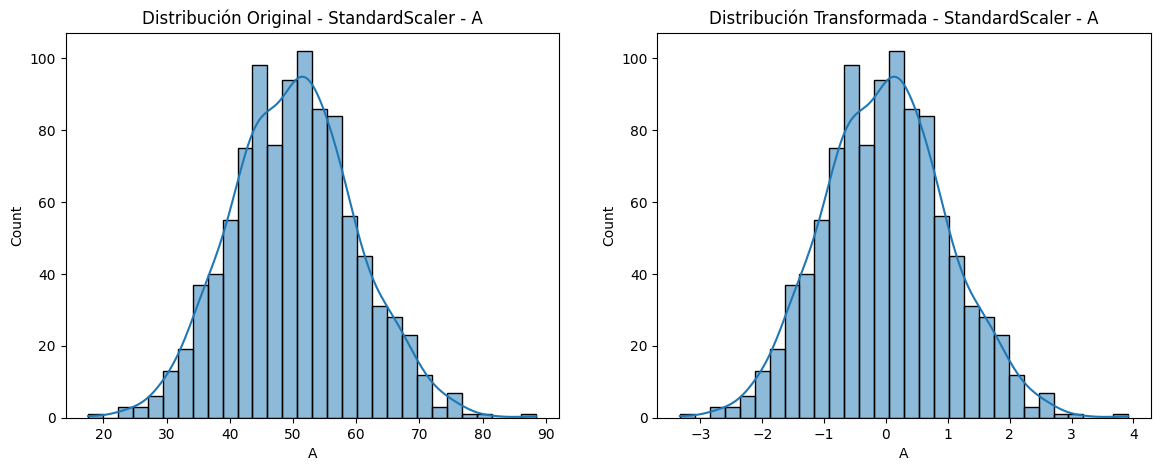


🔹 A: MinMaxScaler


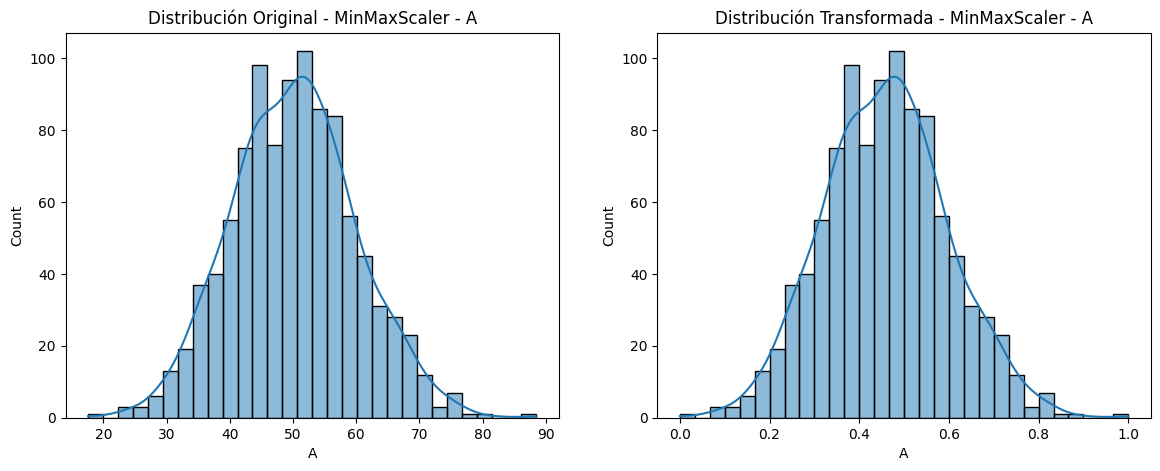


🔹 A: QuantileTransformer (Distribución normal)


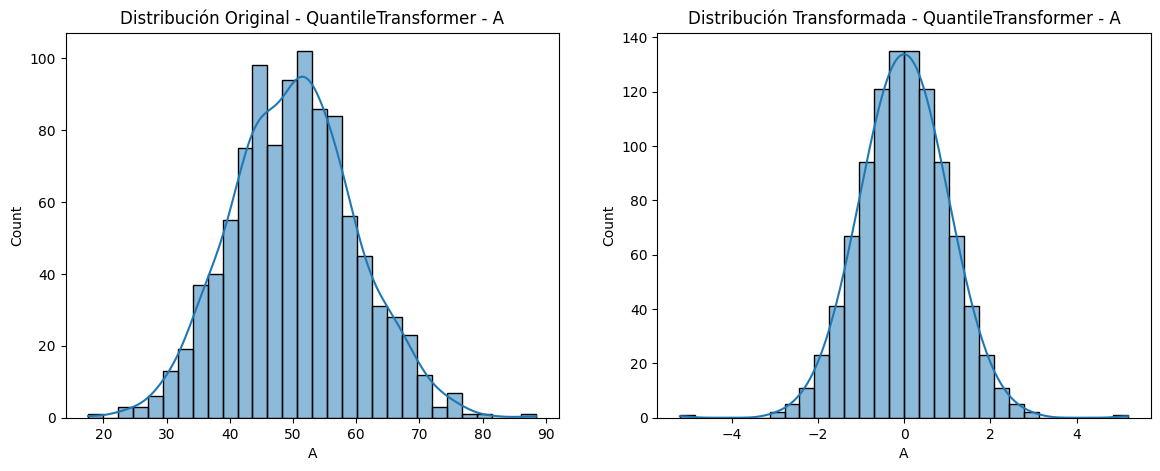


🔹 B: StandardScaler


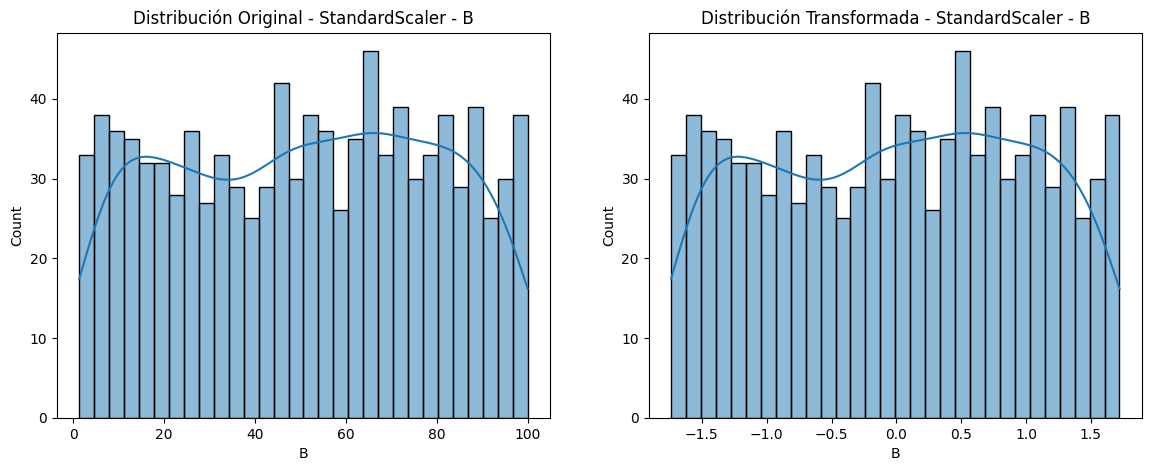


🔹 B: MinMaxScaler


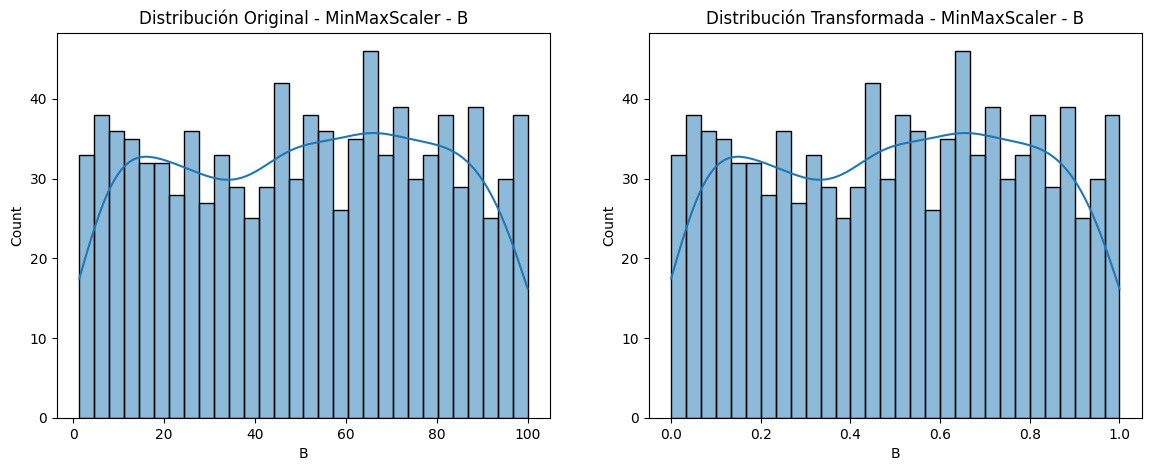


🔹 B: QuantileTransformer (Distribución normal)


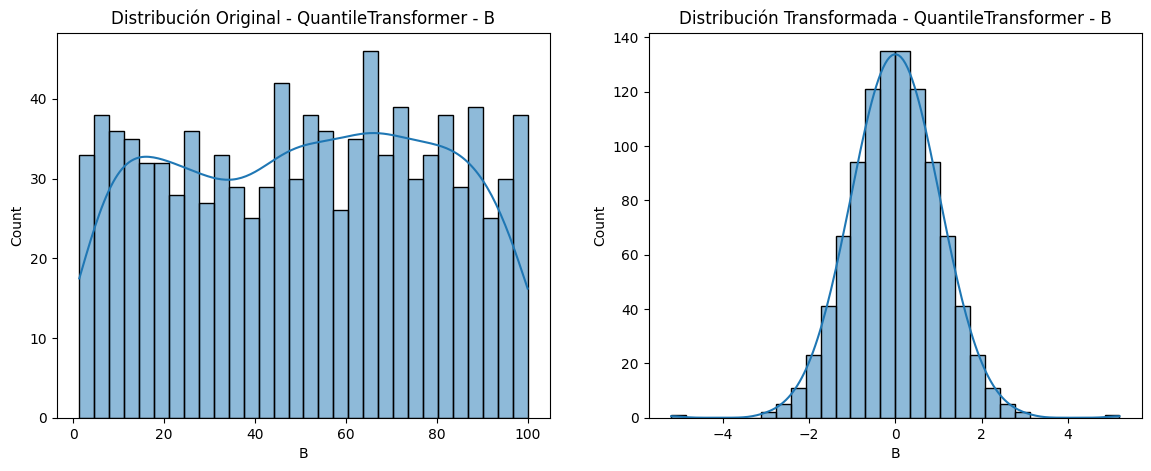


🔹 C: StandardScaler


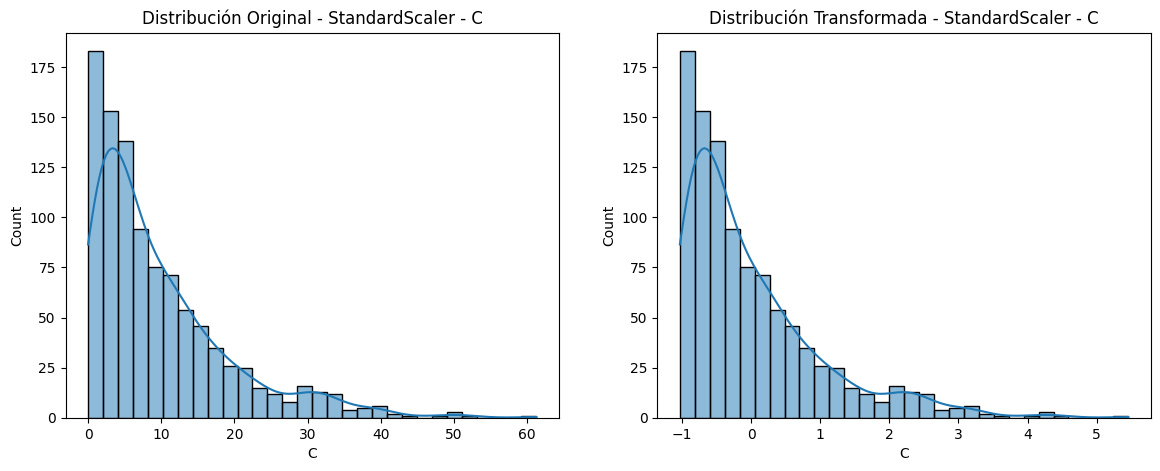


🔹 C: MinMaxScaler


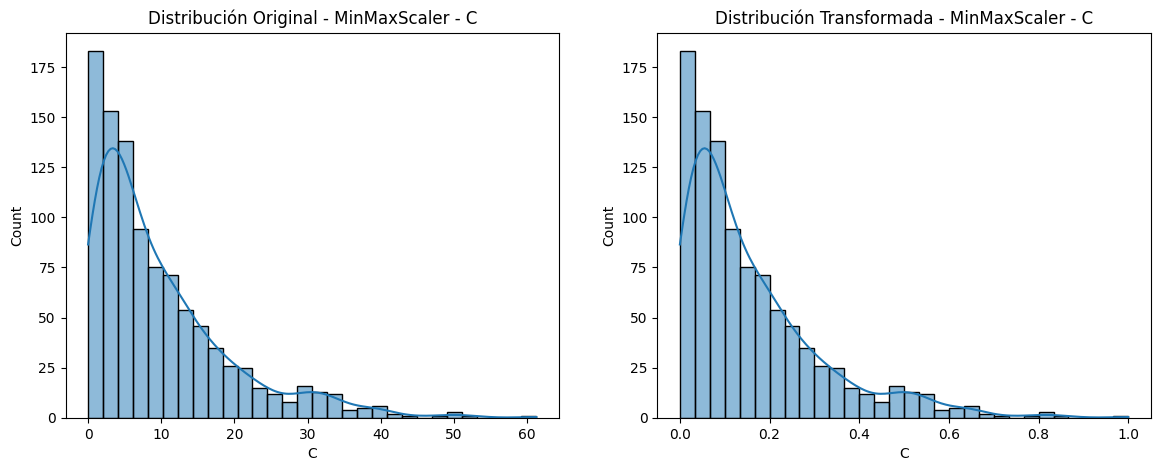


🔹 C: QuantileTransformer (Distribución normal)


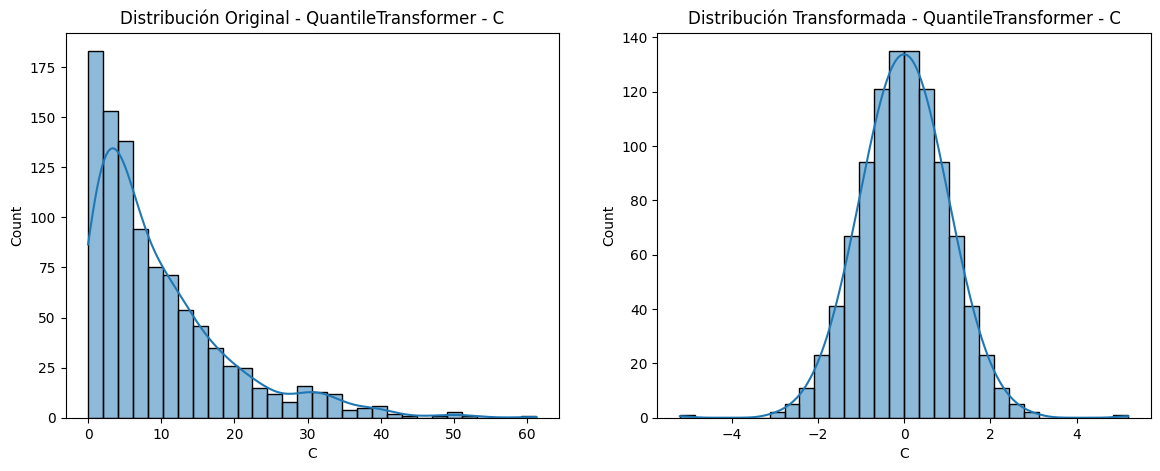

In [ ]:
scaler_standard = StandardScaler()
data_standard = pd.DataFrame(scaler_standard.fit_transform(data), columns=data.columns)

# 📌 Aplicamos MinMaxScaler
scaler_minmax = MinMaxScaler()
data_minmax = pd.DataFrame(scaler_minmax.fit_transform(data), columns=data.columns)

# 📌 Aplicamos QuantileTransformer (Distribución normal)
scaler_quantile = QuantileTransformer(output_distribution='normal', random_state=42)
data_quantile = pd.DataFrame(scaler_quantile.fit_transform(data), columns=data.columns)

# 🔹 Graficamos cada transformación
for col in data.columns:
    print(f"\n🔹 {col}: StandardScaler")
    plot_distributions(data[col], data_standard[col], f'StandardScaler - {col}')

    print(f"\n🔹 {col}: MinMaxScaler")
    plot_distributions(data[col], data_minmax[col], f'MinMaxScaler - {col}')

    print(f"\n🔹 {col}: QuantileTransformer (Distribución normal)")
    plot_distributions(data[col], data_quantile[col], f'QuantileTransformer - {col}')


# 🔄 Transformación de Datos Categóricos en Machine Learning  

Cuando trabajamos con datos categóricos en Machine Learning, no podemos usarlos directamente en los modelos, ya que estos esperan valores numéricos. Por eso, debemos transformarlos en números usando diferentes técnicas.  

## 📌 ¿Cuáles son las dos formas principales de codificación?  

### 🔹 **1. Ordinal Encoding (OrdinalEncoder)**  
Se usa cuando las categorías tienen un **orden lógico**.  
Ejemplo: Tamaños de camisetas (`S < M < L < XL`).  

🔸 Convierte las categorías en números según su jerarquía:  

| Talla Original | Talla Codificada |
|---------------|----------------|
| S            | 0              |
| M            | 1              |
| L            | 2              |
| XL           | 3              |

💡 **Usar este método con datos sin orden puede llevar a errores, ya que los modelos pueden interpretar diferencias numéricas inexistentes.**  

---

### 🔹 **2. One-Hot Encoding (OneHotEncoder)**  
Se usa cuando las categorías **NO tienen un orden específico**.  
Ejemplo: Ciudades (`Bogotá, Lima, Madrid`).  

🔸 Crea una nueva columna para cada categoría y usa 0 o 1 para indicar su presencia:  

| Ciudad  | Bogotá | Lima | Madrid |
|---------|--------|------|--------|
| Bogotá  | 1      | 0    | 0      |
| Lima    | 0      | 1    | 0      |
| Madrid  | 0      | 0    | 1      |

---

### 🚨 **Recomendaciones para controlar la cardinalidad en One-Hot Encoding**  

📌 **La cardinalidad alta (muchas categorías únicas) puede ser un problema, ya que:**  
- Aumenta demasiado el número de columnas, haciendo el modelo más complejo.  
- Puede causar problemas de memoria y sobreajuste.  

**💡 Estrategias para reducir la cardinalidad:**  
1. **Agrupar categorías poco frecuentes** en una sola (`"Otros"` o `"Desconocido"`).  
2. **Usar `drop='first'` en `OneHotEncoder`** para evitar una columna redundante.  
3. **Utilizar Hashing Encoding o Embeddings** en lugar de One-Hot Encoding si hay muchas categorías únicas.  
4. **Aplicar técnicas de reducción de dimensionalidad**, como PCA, si el número de columnas es muy alto.  

📌 **A continuación, veamos cómo implementar esto en Python con `sklearn`.**


In [ ]:
# 📌 Dataset de ejemplo con datos categóricos
data = pd.DataFrame({
    'Talla': ['S', 'M', 'L', 'XL', 'S', 'M'],
    'Ciudad': ['Bogotá', 'Lima', 'Madrid', 'Bogotá', 'Lima', 'Madrid']
})

print("🔹 Dataset original:\n")
data

🔹 Dataset original:



,Talla,Ciudad
0,S,Bogotá
1,M,Lima
2,L,Madrid
3,XL,Bogotá
4,S,Lima
5,M,Madrid


In [ ]:

# 🔹 1. Aplicamos Ordinal Encoding a la columna 'Talla'
orden_tallas = [['S', 'M', 'L', 'XL']]  # Especificamos el orden de las categorías
ordinal_encoder = OrdinalEncoder(categories=orden_tallas)
data['Talla_Ordinal'] = ordinal_encoder.fit_transform(data[['Talla']])

print("\n🔹 Dataset con Ordinal Encoding:\n", data)

# 🔹 2. Aplicamos One-Hot Encoding a la columna 'Ciudad'
onehot_encoder = OneHotEncoder(sparse_output=False, drop='first')  # `drop='first'` para evitar multicolinealidad
ciudades_encoded = onehot_encoder.fit_transform(data[['Ciudad']])

# Convertimos la salida en un DataFrame y lo unimos al original
ciudades_df = pd.DataFrame(ciudades_encoded, columns=onehot_encoder.get_feature_names_out(['Ciudad']))
data = pd.concat([data, ciudades_df], axis=1).drop(columns=['Ciudad'])

print("\n🔹 Dataset con One-Hot Encoding:\n", data)



🔹 Dataset con Ordinal Encoding:
   Talla  Ciudad  Talla_Ordinal
0     S  Bogotá          0.000
1     M    Lima          1.000
2     L  Madrid          2.000
3    XL  Bogotá          3.000
4     S    Lima          0.000
5     M  Madrid          1.000

🔹 Dataset con One-Hot Encoding:
   Talla  Talla_Ordinal  Ciudad_Lima  Ciudad_Madrid
0     S          0.000        0.000          0.000
1     M          1.000        1.000          0.000
2     L          2.000        0.000          1.000
3    XL          3.000        0.000          0.000
4     S          0.000        1.000          0.000
5     M          1.000        0.000          1.000


# 🚀 Pipelines en `sklearn` para imputación y transformación  

Cuando trabajamos con datos en Machine Learning, es común que necesitemos **imputar valores faltantes y transformar variables** antes de entrenar un modelo.  
Hacer esto manualmente en cada paso puede ser tedioso y propenso a errores.  

💡 **Solución:** `Pipeline` de `sklearn` nos permite automatizar este proceso, asegurando que las transformaciones se apliquen en el orden correcto.  

---

## 🔹 **¿Qué hace un `Pipeline`?**  

✅ Aplica **imputación** a los valores faltantes.  
✅ Transforma las variables categóricas y numéricas.  
✅ Garantiza que el preprocesamiento se aplique igual en entrenamiento y prueba.  

📌 **Ejemplo:**  
1. **Para datos numéricos**, imputamos valores faltantes y escalamos los datos.  
2. **Para datos categóricos**, imputamos valores y aplicamos One-Hot Encoding.  
3. Usamos `ColumnTransformer` para aplicar distintas transformaciones según el tipo de dato.  
4. Encapsulamos todo en un `Pipeline`.  

---

## 🛠 **¿Cómo se usa en Python?**  

A continuación, veremos cómo construir un `Pipeline` en `sklearn` para manejar datos numéricos y categóricos.  


In [ ]:
# 📌 Simulamos un dataset con valores faltantes
data = pd.DataFrame({
    'edad': [25, np.nan, 30, 45, np.nan, 50],
    'salario': [50000, 55000, np.nan, 70000, 72000, np.nan],
    'ciudad': ['Bogotá', 'Lima', 'Bogotá', None, 'Madrid', 'Lima']
})

data

,edad,salario,ciudad
0,25.000,50000.000,Bogotá
1,NaN,55000.000,Lima
2,30.000,NaN,Bogotá
3,45.000,70000.000,None
4,NaN,72000.000,Madrid
5,50.000,NaN,Lima


In [ ]:
# 📌 Definimos columnas numéricas y categóricas
num_features = ['edad', 'salario']
cat_features = ['ciudad']

# 🔹 Pipeline para datos numéricos (imputación + escalado)
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),  # Imputamos con la mediana
    ('scaler', StandardScaler())  # Normalizamos los datos
])

# 🔹 Pipeline para datos categóricos (imputación + one-hot encoding)
cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent',missing_values=None)),  # Rellenamos con la categoría más común
    ('encoder', OneHotEncoder(handle_unknown='ignore'))  # Convertimos a variables dummies
])

# 📌 Combinamos todo en un ColumnTransformer
preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_features),
    ('cat', cat_pipeline, cat_features)
])

# 🔹 Aplicamos la transformación
data_transformed = preprocessor.fit_transform(data)

# 📌 Convertimos el resultado en un DataFrame con nombres de columnas
cat_cols = preprocessor.named_transformers_['cat']['encoder'].get_feature_names_out(cat_features)
columns = num_features + list(cat_cols)
data_transformed_df = pd.DataFrame(data_transformed, columns=columns)

# 📊 Mostramos el resultado
print("🔹 Datos después del preprocesamiento:\n")
data_transformed_df

🔹 Datos después del preprocesamiento:



,edad,salario,ciudad_Bogotá,ciudad_Lima,ciudad_Madrid
0,-1.485,-1.555,1.000,0.000,0.000
1,0.000,-0.907,0.000,1.000,0.000
2,-0.891,0.065,1.000,0.000,0.000
3,0.891,1.036,1.000,0.000,0.000
4,0.000,1.296,0.000,0.000,1.000
5,1.485,0.065,0.000,1.000,0.000


In [ ]:
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['edad', 'salario']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(missing_values=None,
                                                                strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['ciudad'])])

# Ejercicio

In [39]:
# Generamos 1000 registros
np.random.seed(42)
data = pd.DataFrame({
    'edad': np.random.randint(18, 65, size=1000),  # Variable numérica
    'ingresos': np.random.normal(50000, 15000, size=1000),  # Variable numérica
    'nivel_educativo': np.random.choice(['Primaria', 'Secundaria', 'Universitario', 'Posgrado'], size=1000, p=[0.1, 0.3, 0.4, 0.2]),  # Ordinal
    'ciudad': np.random.choice(['Bogotá', 'Medellín', 'Cali', 'Barranquilla'], size=1000)  # Categórica no ordinal
})

# Introducimos valores faltantes en un 10% de los datos
for col in ['edad', 'ingresos']:
    data.loc[data.sample(frac=0.1).index, col] = np.nan

for col in ['nivel_educativo','ciudad']:
    data.loc[data.sample(frac=0.1).index, col] = None

# Mostramos los primeros registros
data.head()


,edad,ingresos,nivel_educativo,ciudad
0,56.000,65094.392,Universitario,Cali
1,46.000,NaN,Universitario,Bogotá
2,32.000,62535.382,Secundaria,None
3,60.000,33054.397,Primaria,Medellín
4,25.000,NaN,Universitario,None


En este ejercicio, aplicarás técnicas de **imputación y transformación de datos** para preparar un conjunto de datos antes de entrenar un modelo de Machine Learning.  

## 🔹 **Objetivo**  
Transformar correctamente los datos utilizando `sklearn`, asegurando que los valores faltantes sean imputados y las variables estén en el formato adecuado para un modelo.  

---

## 🔎 **Pasos a seguir**  

### 1️⃣ **Explorar los datos**  
- Carga el dataset en un `DataFrame`.  
- Usa `.info()` y `.describe()` para entender la estructura y las características de los datos.  
- Usa `.isnull().sum()` para verificar cuántos valores faltantes tiene cada columna.  

### 2️⃣ **Identificar los tipos de variables**  
- Crea una lista con las **variables numéricas**.  
- Crea una lista con las **variables categóricas ordinales**.  
- Crea una lista con las **variables categóricas no ordinales**.  

### 3️⃣ **Seleccionar el método de imputación para las variables numéricas**  
- Prueba diferentes técnicas de imputación como la **media**, **mediana** o **KNNImputer**.  
- Aplica el método de imputación elegido y verifica que ya no haya valores nulos en las variables numéricas.  

### 4️⃣ **Seleccionar el método de imputación para las variables categóricas**  
- Para las variables **ordinales**, usa `SimpleImputer` con la estrategia más adecuada.  
- Para las variables **no ordinales**, usa `SimpleImputer` con la estrategia `most_frequent` o `constant`.  
- Verifica que ya no haya valores nulos en las variables categóricas.  

### 5️⃣ **Seleccionar el método de transformación para las variables numéricas**  
- Prueba diferentes escaladores (`StandardScaler`, `MinMaxScaler`, `QuantileTransformer`).  
- Aplica el método elegido y verifica los cambios en la escala de los datos numéricos.  

### 6️⃣ **Seleccionar el método de transformación para las variables categóricas**  
- Para las variables **ordinales**, usa `OrdinalEncoder` asegurándote de definir el orden correcto.  
- Para las variables **no ordinales**, usa `OneHotEncoder`.  
- **💡 Importante:** Si la variable tiene demasiadas categorías, usa `handle_unknown='ignore'` o aplica estrategias para reducir la cardinalidad.  

### 7️⃣ **Construcción del pipeline de preprocesamiento**  
- Usa `ColumnTransformer` para aplicar las transformaciones a cada tipo de variable.  
- Usa `Pipeline` para combinar la imputación y la transformación en un solo proceso.  

### 8️⃣ **Aplicación del pipeline a los datos**  
- Ajusta (`fit`) el pipeline con los datos y **transforma** (`transform`) el dataset original.  
- Verifica que los datos han sido correctamente preprocesados y están listos para ser utilizados en un modelo de Machine Learning.  

🎯 **¡Listo! Has completado el preprocesamiento de datos de manera eficiente y automatizada!** 🚀  


# Prueba

In [63]:
# 1
display(
    data.info(),
    data.describe(),
    data.isna().sum()
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   edad             900 non-null    float64
 1   ingresos         900 non-null    float64
 2   nivel_educativo  900 non-null    object 
 3   ciudad           900 non-null    object 
dtypes: float64(2), object(2)
memory usage: 31.4+ KB


None

,edad,ingresos
count,900.000,900.000
mean,41.022,51564.964
std,13.510,14962.764
min,18.000,6556.169
25%,29.000,41632.260
50%,42.000,51797.088
75%,52.000,61135.813
max,64.000,89025.247


edad               100
ingresos           100
nivel_educativo    100
ciudad             100
dtype: int64

In [64]:
# 2
num_features = ['edad', 'ingresos']
ord_features = ['nivel_educativo']
cat_features = ['ciudad']

In [65]:
# 3
num_imputer = SimpleImputer(missing_values = np.nan, strategy='mean')
num_imputer.fit_transform(data[num_features])

array([[5.60000000e+01, 6.50943921e+04],
       [4.60000000e+01, 5.15649639e+04],
       [3.20000000e+01, 6.25353817e+04],
       ...,
       [2.70000000e+01, 2.60794540e+04],
       [6.10000000e+01, 5.77040016e+04],
       [1.90000000e+01, 4.20094874e+04]], shape=(1000, 2))

In [67]:
# 4 Categoricas Ordinales
ord_imputer = SimpleImputer(missing_values = None, strategy='most_frequent')
ord_imputer.fit_transform(data[ord_features])[:5]

array([['Universitario'],
       ['Universitario'],
       ['Secundaria'],
       ['Primaria'],
       ['Universitario']], dtype=object)

In [68]:
# 4 Categoricas No Ordinales
cat_imputer = SimpleImputer(missing_values = None, strategy='most_frequent')
cat_imputer.fit_transform(data[cat_features])[:5]

array([['Cali'],
       ['Bogotá'],
       ['Cali'],
       ['Medellín'],
       ['Cali']], dtype=object)

In [69]:
# 5 Scaler
standard_scaler = StandardScaler()
standard_scaler.fit_transform(data[num_features])

array([[ 1.10922648,  0.90470924],
       [ 0.368645  ,         nan],
       [-0.66816907,  0.7335889 ],
       ...,
       [-1.0384598 , -1.70420922],
       [ 1.47951722,  0.4105158 ],
       [-1.63092499, -0.63897216]], shape=(1000, 2))

In [70]:
# 6 Ordinal Encoder
orden_educativo = [['Primaria', 'Secundaria', 'Preparatoria', 'Universitario', 'Posgrado']]  # Especificamos el orden de las categorías
ordinal_encoder = OrdinalEncoder(
    categories=orden_educativo,
    handle_unknown = 'use_encoded_value', # En caso de encontrar columna nueva, use -999
    unknown_value= -999)

ordinal_encoder.fit_transform(data[ord_features].fillna('Secundaria'))[:5]

array([[3.],
       [3.],
       [1.],
       [0.],
       [3.]])

In [71]:
# 6 One Hot Encoder
onehot_encoder = OneHotEncoder(
    sparse_output=False, 
    handle_unknown='infrequent_if_exist',
    min_frequency=0.05
)

onehot_encoder.fit_transform(data[cat_features].fillna('Medellin'))[:5]

array([[0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.]])

In [72]:
# 🔹 Pipeline para datos numericos
num_pipeline = Pipeline([
    ('imputer',SimpleImputer(missing_values = np.nan, strategy='mean')),  # Imputamos con la mediana
    ('scaler', StandardScaler())  # Normalizamos los datos
])

# 🔹 Pipeline para datos categóricos (imputación + one-hot encoding)
ordinal_pipeline = Pipeline([
    ('imputer', SimpleImputer(missing_values = None, strategy='most_frequent')),
    (
      'encoder',
      OrdinalEncoder(
        categories = orden_educativo,
        handle_unknown = 'use_encoded_value',
        unknown_value = -999
      )
    )
])

not_ordinal_pipeline = Pipeline([
    ('imputer', SimpleImputer(missing_values = None, strategy='most_frequent')),
    (
      'encoder',
      OneHotEncoder(
        handle_unknown = 'infrequent_if_exist',
        min_frequency=0.05,
        sparse_output=False
      )
    )
])

# 📌 Combinamos todo en un ColumnTransformer
preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_features),
    ('cat_ordinal', ordinal_pipeline, ord_features),
    ('cat_not_ordinal', not_ordinal_pipeline, cat_features)
])

In [73]:
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 ['edad', 'ingresos']),
                                ('cat_ordinal',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(missing_values=None,
                                                                strategy='most_frequent')),
                                                 ('encoder',
                                                  OrdinalEncoder(categories=[['Primaria',
                                                                              'Secundaria',
                                                                              'Preparatoria',
                                                                              'Universitario',
                                                                              'Posgrado']],
                                                                 handle_unknown='use_encoded_value',
                                                                 unknown_value=-999))]),
                                 ['nivel_educativo']),
                                ('cat_not_ordinal',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(missing_values=None,
                                                                strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='infrequent_if_exist',
                                                                min_frequency=0.05,
                                                                sparse_output=False))]),
                                 ['ciudad'])])

In [74]:
transformed_data = preprocessor.fit_transform(data)

cat_ord_clean_cols = (
    preprocessor
    .named_transformers_
    ['cat_not_ordinal']
    ['encoder']
    .get_feature_names_out(cat_features)
    .tolist()
)

data_clean = pd.DataFrame(
    transformed_data,
    columns = num_features + ord_features + cat_ord_clean_cols
)

data_clean

,edad,ingresos,nivel_educativo,ciudad_Barranquilla,ciudad_Bogotá,ciudad_Cali,ciudad_Medellín
0,1.169,0.954,3.000,0.000,0.000,1.000,0.000
1,0.389,0.000,3.000,0.000,1.000,0.000,0.000
2,-0.704,0.773,1.000,0.000,0.000,1.000,0.000
3,1.481,-1.305,0.000,0.000,0.000,0.000,1.000
4,-1.251,0.000,3.000,0.000,0.000,1.000,0.000
...,...,...,...,...,...,...,...
995,-1.485,-0.266,0.000,0.000,1.000,0.000,0.000
996,-0.080,-0.603,3.000,0.000,1.000,0.000,0.000
997,-1.095,-1.796,4.000,0.000,0.000,0.000,1.000
998,1.560,0.433,3.000,0.000,1.000,0.000,0.000


# Solucion

## 1.

In [52]:
display(
    data.info(),
    data.describe(),
    data.isna().mean()
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   edad             900 non-null    float64
 1   ingresos         900 non-null    float64
 2   nivel_educativo  900 non-null    object 
 3   ciudad           900 non-null    object 
dtypes: float64(2), object(2)
memory usage: 31.4+ KB


None

,edad,ingresos
count,900.000,900.000
mean,41.022,51564.964
std,13.510,14962.764
min,18.000,6556.169
25%,29.000,41632.260
50%,42.000,51797.088
75%,52.000,61135.813
max,64.000,89025.247


edad              0.100
ingresos          0.100
nivel_educativo   0.100
ciudad            0.100
dtype: float64

## 2.

In [53]:
num_col = ['edad', 'ingresos']
cat_ord_col = ['nivel_educativo']
cat_not_ord_col = ['ciudad']

## 3.

In [54]:
num_imputter = SimpleImputer(strategy='median')
num_imputter.fit_transform(data[num_col])

array([[5.60000000e+01, 6.50943921e+04],
       [4.60000000e+01, 5.17970877e+04],
       [3.20000000e+01, 6.25353817e+04],
       ...,
       [2.70000000e+01, 2.60794540e+04],
       [6.10000000e+01, 5.77040016e+04],
       [1.90000000e+01, 4.20094874e+04]], shape=(1000, 2))

## 4.

In [55]:
cat_imputter = SimpleImputer(missing_values = None, strategy='most_frequent')
cat_imputter.fit_transform(data[cat_ord_col])[:5]

array([['Universitario'],
       ['Universitario'],
       ['Secundaria'],
       ['Primaria'],
       ['Universitario']], dtype=object)

In [56]:
cat_imputter = SimpleImputer(missing_values = None, strategy='most_frequent')
cat_imputter.fit_transform(data[cat_not_ord_col])[:5]

array([['Cali'],
       ['Bogotá'],
       ['Cali'],
       ['Medellín'],
       ['Cali']], dtype=object)

## 5.

In [57]:
standar_scaler = StandardScaler()
standar_scaler.fit_transform(data[num_col])

array([[ 1.10922648,  0.90470924],
       [ 0.368645  ,         nan],
       [-0.66816907,  0.7335889 ],
       ...,
       [-1.0384598 , -1.70420922],
       [ 1.47951722,  0.4105158 ],
       [-1.63092499, -0.63897216]], shape=(1000, 2))

## 6.

In [58]:
categorias = [['Primaria', 'Secundaria', 'Universitario', 'Posgrado']]
ordinal_encoder = OrdinalEncoder(
    categories = categorias,
    handle_unknown = 'use_encoded_value',
    unknown_value = -999)

ordinal_encoder.fit_transform(data[cat_ord_col].fillna('Secundaria'))[:5]

array([[2.],
       [2.],
       [1.],
       [0.],
       [2.]])

In [59]:
categorias = [['Primaria', 'Secundaria', 'Universitario', 'Posgrado']]
one_hot_encoder = OneHotEncoder(
    handle_unknown = 'infrequent_if_exist',
    min_frequency=0.05,
    sparse_output=False
)

one_hot_encoder.fit_transform(data[cat_not_ord_col].fillna('Medellin'))[:5]

array([[0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.]])

## 7.

In [60]:
num_pipeline = Pipeline([
    ('imputer',SimpleImputer(missing_values = np.nan,strategy='mean')),  # Imputamos con la mediana
    ('scaler', StandardScaler())  # Normalizamos los datos
])

# 🔹 Pipeline para datos categóricos (imputación + one-hot encoding)
ordinal_pipeline = Pipeline([
    ('imputer', SimpleImputer(missing_values = None, strategy='most_frequent')),
    (
      'encoder',
      OrdinalEncoder(
        categories = categorias,
        handle_unknown = 'use_encoded_value',
        unknown_value = -999
      )
    )
])

not_ordinal_pipeline = Pipeline([
    ('imputer', SimpleImputer(missing_values = None, strategy='most_frequent')),
    (
      'encoder',
      OneHotEncoder(
        handle_unknown = 'infrequent_if_exist',
        min_frequency=0.05,
        sparse_output=False
      )
    )
])

# 📌 Combinamos todo en un ColumnTransformer
preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_col),
    ('cat_ordinal', ordinal_pipeline, cat_ord_col),
    ('cat_not_ordinal', not_ordinal_pipeline, cat_not_ord_col)
])

In [61]:
transformed_data = preprocessor.fit_transform(data)


cat_ord_clean_cols = (
    preprocessor
    .named_transformers_
    ['cat_not_ordinal']
    ['encoder']
    .get_feature_names_out(cat_not_ord_col)
    .tolist()
)

data_clean = pd.DataFrame(
    transformed_data,
    columns = num_col+cat_ord_col+cat_ord_clean_cols
)

data_clean

,edad,ingresos,nivel_educativo,ciudad_Barranquilla,ciudad_Bogotá,ciudad_Cali,ciudad_Medellín
0,1.169,0.954,2.000,0.000,0.000,1.000,0.000
1,0.389,0.000,2.000,0.000,1.000,0.000,0.000
2,-0.704,0.773,1.000,0.000,0.000,1.000,0.000
3,1.481,-1.305,0.000,0.000,0.000,0.000,1.000
4,-1.251,0.000,2.000,0.000,0.000,1.000,0.000
...,...,...,...,...,...,...,...
995,-1.485,-0.266,0.000,0.000,1.000,0.000,0.000
996,-0.080,-0.603,2.000,0.000,1.000,0.000,0.000
997,-1.095,-1.796,3.000,0.000,0.000,0.000,1.000
998,1.560,0.433,2.000,0.000,1.000,0.000,0.000
